In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [63]:
df = pd.read_csv('./stars_class.csv', delimiter=';', index_col=0)


In [64]:
df = pd.read_csv('./stars_class.csv', delimiter=';')

(array([300.,   0.,   0.,   0.,   0.,  72.,   0.,   0.,   0.,  66.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

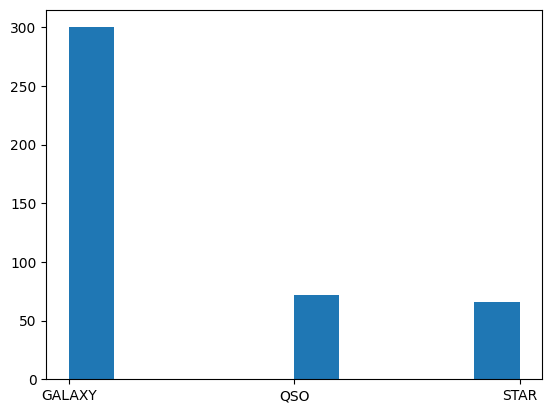

In [65]:
plt.hist(df['class'])

In [66]:
df.head()

,class,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
0,GALAXY,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,0.634794,5812,56354,171
1,GALAXY,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,0.779136,10445,58158,427
2,GALAXY,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,0.644195,4576,55592,299
3,GALAXY,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,0.932346,9149,58039,775
4,GALAXY,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,0.116123,6121,56187,842


In [67]:
df.shape

(438, 15)

In [68]:
# calculando a média de cada variável
dfm = df.mean()

# calculando o desviopadrão de cada variável
dfdp = df.std()

# escalando os dados
dfauto = (df - dfm) / dfdp

C:\Users\lucas.mesquita.souza\AppData\Local\Temp\ipykernel_12788\205970330.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfm = df.mean()
C:\Users\lucas.mesquita.souza\AppData\Local\Temp\ipykernel_12788\205970330.py:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfdp = df.std()


In [69]:
dfm.head()

alpha    186.400368
delta     21.492658
u         22.390126
g         20.869629
r         19.776297
dtype: float64

In [70]:
dfdp.head()

alpha    110.243052
delta     16.604590
u          2.128084
g          1.938448
r          1.817665
dtype: float64

In [71]:
dfauto.head()

,MJD,alpha,cam_col,class,delta,fiber_ID,field_ID,g,i,plate,r,redshift,run_ID,u,z
0,0.383573,-0.459995,-1.098286,NaN,0.662586,-1.023423,-0.834035,0.725153,0.025944,0.193067,0.340389,0.048627,-0.622773,0.699546,0.024863
1,1.408539,-0.377115,1.279223,NaN,0.589086,-0.070076,-0.497493,1.012279,1.214224,1.798778,1.544918,0.246132,-0.199827,1.121884,1.662508
2,-0.049367,-0.401037,-1.098286,NaN,0.848548,-0.546750,-0.489080,0.925617,0.134447,-0.235307,0.458535,0.061491,-0.622773,1.350014,0.114602
3,1.340928,1.381862,-0.305783,NaN,-1.318641,1.225880,0.301792,1.499618,0.820435,1.349609,1.009715,0.455771,-0.351011,-0.119030,0.289847
4,0.288690,1.441199,-0.305783,NaN,-0.018597,1.475389,-0.346050,-1.696898,-1.866280,0.300161,-1.803868,-0.661075,1.462280,-1.387608,-1.861597


In [72]:
pca = PCA(n_components=10)

In [73]:
x = np.asanyarray(dfauto.iloc[:,0:17])

In [74]:
pca.fit(x)
pca.components_

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Text(0, 0.5, 'Eigenvalue')

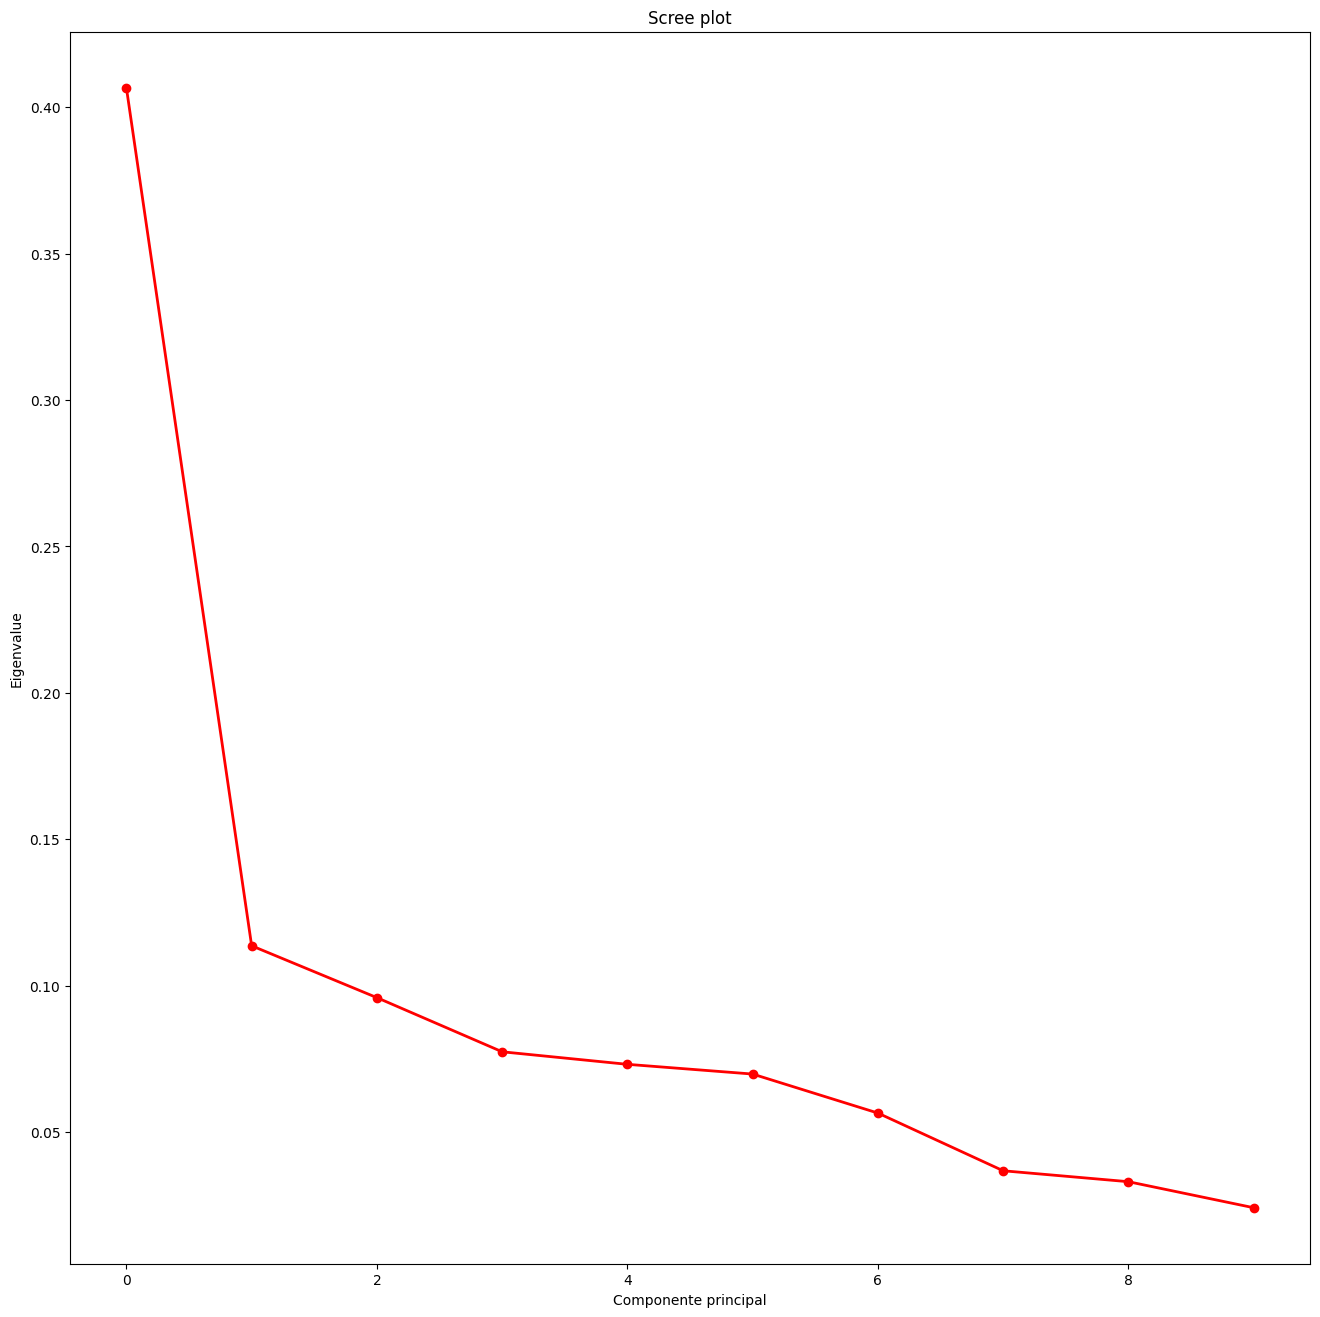

In [ ]:
fig = plt.figure(figsize = (16, 16))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree plot')
plt.xlabel('Componente principal')
plt.ylabel('Eigenvalue')

In [ ]:
pca.transform(x)

array([[-0.5747458 , -1.03000605, -0.92481018, ..., -0.38605016,
         0.58900096,  0.31691339],
       [-3.4459647 , -1.06965421, -0.48742613, ..., -0.35361894,
         0.27777331,  0.01136052],
       [-0.71153417, -1.25550577, -1.12036973, ...,  0.26210954,
         0.48846996,  0.34926499],
       ...,
       [-0.67332242, -1.72728666, -1.09686962, ...,  0.3622901 ,
        -0.01191355,  0.4376241 ],
       [ 3.80070725, -0.8600752 , -1.29030622, ...,  0.73167726,
        -0.06608066, -0.50641621],
       [ 1.20404792, -0.55370887, -1.26014924, ...,  1.02445765,
        -0.38453617,  1.23961534]])

In [ ]:
pca1 = pca.transform(x)[:,0]
pca2 = pca.transform(x)[:,1]
pca3 = pca.transform(x)[:,2]
pca4 = pca.transform(x)[:,3]
pcall = pca.transform(x)

In [ ]:
df['pca1'] = pca1
df['pca2'] = pca2
df['pca3'] = pca3
df['pca4'] = pca4

In [ ]:
df.sort_values(by='pca4', ascending=False).head(50)

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID,pca1,pca2,pca3,pca4
class,,,,,,,,,,,,,,,,,,
QSO,132.830198,44.727158,20.49408,20.20650,20.22691,20.19625,19.82982,2825,5,187,2.156938,8281,57042,754,-1.163665,-0.333481,-1.075245,3.108699
QSO,169.394457,27.746621,19.55769,19.46900,19.24376,19.25563,19.37844,5112,6,389,1.320359,11357,58522,99,-0.848752,1.880092,-0.266493,3.085769
QSO,2.172226,16.196656,21.58020,20.57191,20.39050,20.20049,20.35182,1739,6,316,2.897480,6178,56213,578,-1.405629,1.182124,-2.171662,2.857302
QSO,135.214699,46.136555,21.67397,20.94035,20.71315,20.38420,19.87807,2825,5,201,2.386626,7516,56782,540,-1.467168,-0.499660,-1.377620,2.595357
QSO,116.095889,30.456612,20.16698,20.08098,20.14427,19.85855,19.66567,2825,5,57,2.050636,10290,58099,69,-1.126380,-0.207997,-0.807368,2.592680
QSO,168.726601,27.680925,21.65936,21.73216,21.61713,21.60229,21.24192,5112,6,385,1.007728,11357,58522,220,-2.993639,1.042841,-0.615570,2.413490
QSO,206.461008,7.427090,20.16308,19.48441,19.33299,19.28960,19.08112,3841,5,276,2.369899,4865,55713,821,-0.089265,1.187693,0.098609,2.327201
STAR,135.743336,46.410297,20.77593,19.10901,18.82173,18.67870,18.72135,2825,5,204,-0.000325,5162,55893,996,1.061975,-0.678266,-0.748816,2.179906
QSO,352.476340,32.083681,19.22127,18.89125,18.77551,18.64375,18.57708,8111,4,37,1.653339,7766,58395,340,0.026700,0.022549,2.300070,2.023139
